<a href="https://colab.research.google.com/github/cornflake15/data-course/blob/pandas/pandas/Pandas-Indexing-Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/rudyhendrawn/data-course/main/datasets/Mall_Customers.csv'
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

**Tampilkan Data Customer yang Annual Income > 25 dan Spending Score > 70**

In [4]:
df.loc[(df['Annual Income (k$)'] > 25) & (df['Spending Score (1-100)'] > 70)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
25,26,Male,29,28,82
29,30,Female,23,29,87
31,32,Female,21,30,73
33,34,Male,18,33,92
35,36,Female,21,33,81
37,38,Female,30,34,73
39,40,Female,20,37,75
41,42,Male,24,38,92
123,124,Male,39,69,91
125,126,Female,31,70,77


In [5]:
df.loc[(df['Annual Income (k$)'] > 25) & (df['Spending Score (1-100)'] > 70)].count()

CustomerID                43
Gender                    43
Age                       43
Annual Income (k$)        43
Spending Score (1-100)    43
dtype: int64

**Tampilkan Customer yang Annual Income > Rata-rata**

In [6]:
df.loc[df['Annual Income (k$)'] > df['Annual Income (k$)'].mean(), ['CustomerID']]

,CustomerID
98,99
99,100
100,101
101,102
102,103
...,...
195,196
196,197
197,198
198,199


In [7]:
df.loc[df['Annual Income (k$)'] > df['Annual Income (k$)'].mean(), ['CustomerID']].count()

CustomerID    102
dtype: int64

In [8]:
print('Average Annual Income: {}'.format(df['Annual Income (k$)'].mean()))

Average Annual Income: 60.56


**Komposisi Gender yang penghasilannya di atas rata-rata??**

In [9]:
# 1. Ambil data Customer yang penghasilannya di atas rata-rata
customer_kaya_raya = df.loc[df['Annual Income (k$)'] > df['Annual Income (k$)'].mean()]
customer_kaya_raya.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
98,99,Male,48,61,42
99,100,Male,20,61,49
100,101,Female,23,62,41
101,102,Female,49,62,48
102,103,Male,67,62,59


In [10]:
# 2. Hitung jumlah gender male dan female
customer_male = customer_kaya_raya.loc[customer_kaya_raya['Gender'] == 'Male', ['CustomerID']].count()
customer_female = customer_kaya_raya.loc[customer_kaya_raya['Gender'] == 'Female', ['CustomerID']].count()

In [11]:
customer_male

CustomerID    49
dtype: int64

In [12]:
# 3. Konversi dalam bentuk persentase
jumlah_customer = len(customer_kaya_raya)
persentase_male = customer_male / jumlah_customer * 100
persentase_female = customer_female / jumlah_customer * 100
print('Komposisi Gender Customer yang penghasilannya di atas rata-rata adalah:')
print('Male {}%   :   Female {}%'.format(round(persentase_male[0], 2), round(persentase_female[0], 2)))

Komposisi Gender Customer yang penghasilannya di atas rata-rata adalah:
Male 48.04%   :   Female 51.96%


## Visualisasi

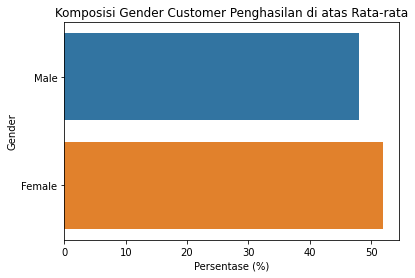

In [13]:
import matplotlib.pyplot as plt

x = [round(persentase_male[0], 2), round(persentase_female[0], 2)]
y = ['Male', 'Female']
sns.barplot(x=x, y=y)
plt.ylabel('Gender')
plt.xlabel('Persentase (%)')
plt.title('Komposisi Gender Customer Penghasilan di atas Rata-rata')
plt.show()